In [1]:
from langchain_community.document_loaders import UnstructuredURLLoader
urls = ['https://www.livemint.com/economy/budget-2024-key-highlights-live-updates-nirmala-sitharaman-infrastructure-defence-income-tax-modi-budget-23-july-11721654502862.html',
        'https://cleartax.in/s/budget-2024-highlights',
        'https://www.hindustantimes.com/budget',
        'https://economictimes.indiatimes.com/news/economy/policy/budget-2024-highlights-india-nirmala-sitharaman-capex-fiscal-deficit-tax-slab-key-announcement-in-union-budget-2024-25/articleshow/111942707.cms?from=mdr']
loader = UnstructuredURLLoader(urls=urls)
data = loader.load() 

In [2]:
len(data)

4

In [3]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# split data
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000)
docs = text_splitter.split_documents(data)


print("Total number of documents: ",len(docs))

Total number of documents:  176


In [4]:
docs[9]

Document(metadata={'source': 'https://www.livemint.com/economy/budget-2024-key-highlights-live-updates-nirmala-sitharaman-infrastructure-defence-income-tax-modi-budget-23-july-11721654502862.html'}, page_content='Furthermore, the proposal to increase the deduction of employer expenditure towards NPS from 10% to 14% of the employee’s salary will improve social security benefits for the workforce. The revamp of the capital gains tax regime will impact investment decisions and financial planning, ensuring a more balanced and fair approach to taxation. These measures collectively contribute to a more robust and financially secure environment for individuals and families across India."\n\n24 Jul 2024, 08:43:19 PM IST\n\nBudget 2024 Key Highlights Live Updates: MP Ahammed, Chairman, Malabar Group, said')

In [5]:
from langchain_community.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()

vector = embeddings.embed_query("hello, world!")
vector[:5]
#vector
# from langchain_huggingface import HuggingFaceEmbeddings

# embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")  # Explicit model
# vector = embeddings.embed_query("hello, world!")
# print(vector[:5])


C:\Users\konde\AppData\Local\Temp\ipykernel_2852\2517662690.py:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings()
C:\Users\konde\AppData\Local\Temp\ipykernel_2852\2517662690.py:2: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()
C:\Users\konde\Downloads\raj_conda\envs\env_langchain1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidg

[0.03492268547415733,
 0.018829984590411186,
 -0.017854733392596245,
 0.00013884168583899736,
 0.07407364249229431]

In [6]:
from langchain_chroma import Chroma
vectorstore = Chroma.from_documents(documents=docs, embedding=HuggingFaceEmbeddings())

C:\Users\konde\AppData\Local\Temp\ipykernel_2852\1700344016.py:2: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  vectorstore = Chroma.from_documents(documents=docs, embedding=HuggingFaceEmbeddings())


In [9]:
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 7})

retrieved_docs = retriever.invoke("Budget highlights")

In [10]:
len(retrieved_docs)

7

In [12]:
print(retrieved_docs[0].page_content)

24 Jul 2024, 02:01:06 PM IST

Budget 2024 Key Highlights Live Updates: Manish Shah praises balanced budget supporting MSMEs and urban housing

Manish Shah, MD & CEO at Godrej Capital, commended the 2024 budget for striking a perfect balance between short-term needs and long-term goals, laying the foundation for a resilient and thriving economy. He praised the government's strong commitment to bolstering the MSME sector, recognizing its pivotal role in the country’s economic advancement.


In [8]:
# from langchain_huggingface import HuggingFacePipeline
# from langchain.prompts import PromptTemplate
# from transformers import pipeline
# from langchain_core.output_parsers import StrOutputParser
# import torch
# from transformers import AutoModelForCausalLM, AutoTokenizer


# #model_id = "meta-llama/Meta-Llama-3-8B"
# model_id = "facebook/opt-1.3b"

# text_generation_pipeline = pipeline(
#     "text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16}, max_new_tokens=400)

# llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

# prompt_template = """
# <|system|>
# Answer the question based on your knowledge. Use the following context to help:

# {context}

# </s>
# <|user|>
# {question}
# </s>
# <|assistant|>

#  """

# prompt = PromptTemplate(
#     input_variables=["context", "question"],
#     template=prompt_template,
# )

# llm_chain = prompt | llm | StrOutputParser()

In [2]:
# from langchain_community.document_loaders import UnstructuredURLLoader
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain_community.embeddings import HuggingFaceEmbeddings
# from langchain_chroma import Chroma
# from langchain_huggingface import HuggingFacePipeline
# from langchain.prompts import PromptTemplate
# from langchain_core.output_parsers import StrOutputParser
# from transformers import pipeline
# import torch

# # Load Documents
# urls = [
#     'https://www.livemint.com/economy/budget-2024-key-highlights-live-updates-nirmala-sitharaman-infrastructure-defence-income-tax-modi-budget-23-july-11721654502862.html',
#     'https://cleartax.in/s/budget-2024-highlights',
#     'https://www.hindustantimes.com/budget',
#     'https://economictimes.indiatimes.com/news/economy/policy/budget-2024-highlights-india-nirmala-sitharaman-capex-fiscal-deficit-tax-slab-key-announcement-in-union-budget-2024-25/articleshow/111942707.cms?from=mdr'
# ]

# loader = UnstructuredURLLoader(urls=urls)
# data = loader.load()

# # Split Data into Chunks
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
# docs = text_splitter.split_documents(data)

# # Generate Embeddings using a High-Performance Model
# embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# # Store in ChromaDB
# vectorstore = Chroma.from_documents(documents=docs, embedding=embedding_model)
# retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 5})

# # Load LLaMA Model (Optimized for Faster Inference)
# model_id = "llama3.2"

# text_generation_pipeline = pipeline(
#     "text-generation",
#     model=model_id,
#     torch_dtype=torch.float16,  # Use float16 for optimized inference
#     device_map="auto",  # Automatically selects GPU/CPU
#     max_new_tokens=400
# )

# llm = HuggingFacePipeline(pipeline=text_generation_pipeline)

# # Define the Prompt Template
# prompt_template = PromptTemplate(
#     input_variables=["context", "question"],
#     template="""
#     <|system|>
#     Answer the question based on your knowledge and the provided context:

#     {context}

#     </s>
#     <|user|>
#     {question}
#     </s>
#     <|assistant|>
#     """
# )

# # Create the LLM Chain
# llm_chain = prompt_template | llm | StrOutputParser()

# # Query the System
# query = "What are the key highlights of Budget 2024?"
# retrieved_docs = retriever.invoke(query)
# context = "\n\n".join([doc.page_content for doc in retrieved_docs])

# response = llm_chain.invoke({"context": context, "question": query})

# # Print the Response
# print("\n🔹 **Budget 2024 Highlights:**\n")
# print(response)


In [10]:
from langchain_community.document_loaders import UnstructuredURLLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_chroma import Chroma
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_community.embeddings import OllamaEmbeddings
from langchain_community.llms import Ollama

# Load Documents from URLs
urls = [
    "https://www.livemint.com/economy/budget-2024-key-highlights-live-updates-nirmala-sitharaman-infrastructure-defence-income-tax-modi-budget-23-july-11721654502862.html",
    "https://cleartax.in/s/budget-2024-highlights",
    "https://www.hindustantimes.com/budget",
    "https://economictimes.indiatimes.com/news/economy/policy/budget-2024-highlights-india-nirmala-sitharaman-capex-fiscal-deficit-tax-slab-key-announcement-in-union-budget-2024-25/articleshow/111942707.cms?from=mdr",
]

loader = UnstructuredURLLoader(urls=urls)
data = loader.load()

# Split Data into Chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=300)
docs = text_splitter.split_documents(data)

# ✅ Use Ollama's DeepSeek Embeddings Model
# embedding_model = OllamaEmbeddings(model="deepseek-r1:14b")
embedding_model = OllamaEmbeddings(model="mxbai-embed-large")

# Store in ChromaDB
vectorstore = Chroma.from_documents(documents=docs, embedding=embedding_model)
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 5})

# ✅ Load DeepSeek LLM via Ollama
llm = Ollama(model="deepseek-r1")

# Define Prompt Template
prompt_template = PromptTemplate(
    input_variables=["context", "question"],
    template="""
    <|system|>
    Answer the question based on your knowledge and the provided context:

    {context}

    </s>
    <|user|>
    {question}
    </s>
    <|assistant|>
    """
)

# Create the LLM Chain
llm_chain = prompt_template | llm | StrOutputParser()

# Query the System
query = "What are the key highlights of Budget 2024?"
retrieved_docs = retriever.invoke(query)
context = "\n\n".join([doc.page_content for doc in retrieved_docs])

response = llm_chain.invoke({"context": context, "question": query})

# Print the Response
print("\n🔹 **Budget 2024 Highlights:**\n")
print(response)



🔹 **Budget 2024 Highlights:**

<think>
Alright, so I need to figure out the key highlights of Budget 2024 based on the provided context. Let me go through the information step by step.

First, looking at the first paragraph, it mentions that Atul Garg from GRM Overseas Limited highlighted that Agriculture remains a cornerstone with a significant provision of ₹1.52 lakh crore. It also talks about introducing high-yielding crop varieties and promoting natural farming along with digital infrastructure for agriculture to support sustainable development.

Next, there's another repetition of the same points, so it seems consistent. Then, in the second paragraph from Livemint, they mention that the Finance Minister Nirmala Sitharaman presented the Budget 2024-25 on July 23 and covered nine priorities. The highlights include provisions for agriculture, employment schemes, loan support for MSMEs, infrastructure development, and a fiscal deficit projection of 4.9% with a target to reduce it to 

# Flow Diagram
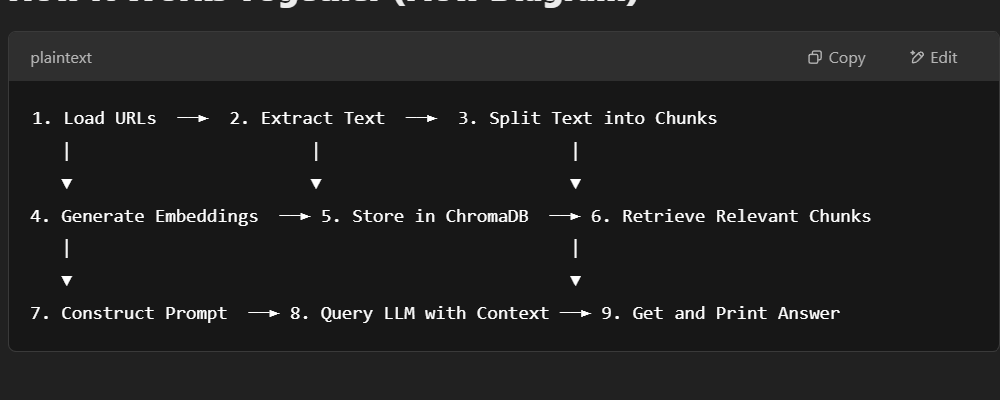